<a href="https://colab.research.google.com/github/GetKhanAdil/DataScience/blob/main/intern_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
## Data Science and Business Analytics Internship- GRIP May'21

## Task 7:- Stock Market Prediction using Numerical and Textual Analysis

## By Adil Khan

###### Jamia Millia Islamia , New Delhi

In [ ]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# importing libraries reqyired for Textual Analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# importing libraries required for Historical Analysis
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [ ]:
# importing libraries required for prediction
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# download the historical dataset
import pandas_datareader.data as web
data= web.DataReader("AMZN",'yahoo',start='2005-01-1', end='2020-12-31')
data.to_csv('prices.csv')

##  Step 2:- Import Dataset

In [ ]:
# headlines data
headlines_df= pd.read_csv("india-news-headlines.csv",error_bad_lines=False,encoding='latin-1')
# historical data
prices_df= pd.read_csv("prices.csv")

C:\Users\asus\AppData\Local\Temp\ipykernel_17096\20802963.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  headlines_df= pd.read_csv("india-news-headlines.csv",error_bad_lines=False,encoding='latin-1')


# Step 3:- Pre-Processing the Data:
## Headlines Dataset

In [ ]:
# headlines data
headlines_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
headlines_df.describe()

,publish_date
count,3.650970e+06
mean,2.013193e+07
std,5.252282e+04
min,2.001010e+07
25%,2.010042e+07
50%,2.014023e+07
75%,2.017093e+07
max,2.022033e+07


In [ ]:
headlines_df.shape

(3650970, 3)

In [ ]:
# drop duplicates
headlines_df.drop_duplicates(inplace=True)

In [ ]:
#drop headlines_category
headlines_df= headlines_df.drop(columns=['headline_category'])

In [ ]:
headlines_df.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [ ]:
# remove special charecters from headline_text
# creating a function 
def remove_special_chars(text):
    
    result = ""
    
    for i in text:
        if i.isalnum() or i == ' ':
            result  = result + i
        else:
            result = result + ""
    return result.strip()

In [ ]:
# applying the function to the dataset
headlines_df['headline_text']=headlines_df['headline_text'].apply(remove_special_chars)

In [ ]:
headlines_df.rename(columns={'publish_date':'date','headline_text':'headline'},inplace=True)

In [ ]:
headlines_df['date']=pd.to_datetime(headlines_df['date'],format='%Y%m%d')

In [ ]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,Americas unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [ ]:
# Group all the headlines for each day

headlines_df['headline']= headlines_df.groupby(['date']).transform(lambda x : ' '.join(x))
headlines_df= headlines_df.drop_duplicates()
headlines_df.reset_index(inplace=True, drop=True)

In [ ]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [ ]:
headlines_df.shape

(7717, 2)

In [ ]:
# functions to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# applying subjectivity and polarity to the columns
headlines_df['Subjectivity']=headlines_df['headline'].apply(getSubjectivity)
headlines_df['Polarity']= headlines_df['headline'].apply(getPolarity)

In [ ]:
headlines_df.head()

,date,headline,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481


Text(0.5, 1.0, 'Polarity Score')

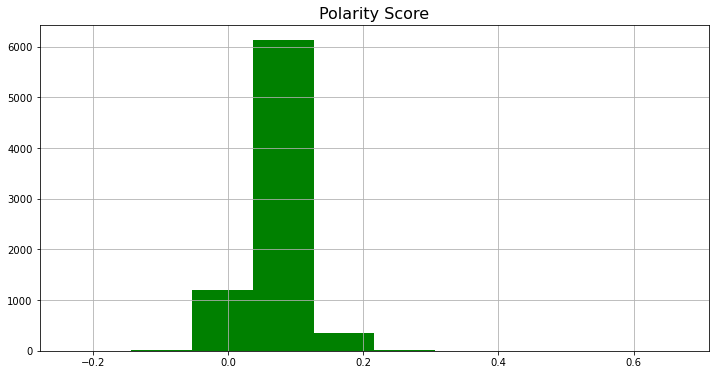

In [ ]:
plt.figure(figsize= (12,6))
headlines_df['Polarity'].hist(color= 'green')
plt.title('Polarity Score',fontsize=16)


Text(0.5, 1.0, 'Subjeectivity Score')

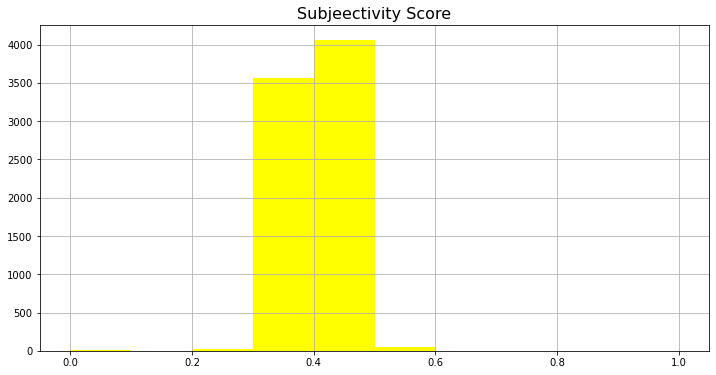

In [ ]:
plt.figure(figsize= (12,6))
headlines_df['Subjectivity'].hist(color= 'yellow')
plt.title('Subjeectivity Score',fontsize=16)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 

In [ ]:
# importing Sentimental Analysis
sia= SentimentIntensityAnalyzer()

In [ ]:
headlines_df['Compound']=[sia.polarity_scores(v)['compound'] for v in headlines_df['headline']]

In [ ]:
headlines_df['Negative']=[sia.polarity_scores(v)['neg'] for v in headlines_df['headline']]

In [ ]:
headlines_df['Neutral']=[sia.polarity_scores(v)['neu'] for v in headlines_df['headline']]

In [ ]:
headlines_df['Positive']=[sia.polarity_scores(v)['pos'] for v in headlines_df['headline']]

In [ ]:
headlines_df.head()

,date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519,-0.9839,0.142,0.790,0.068
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.1779,0.121,0.767,0.112
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052,0.9294,0.097,0.790,0.113
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415,0.8689,0.123,0.723,0.154
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481,-0.5574,0.165,0.702,0.133


In [ ]:
headlines_df.shape

(7717, 8)

In [ ]:
headlines_df.rename(columns= {'date':'Date'}, inplace=True)

### Historical Dataset

In [ ]:
prices_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-12-31,2.2745,2.2080,2.2565,2.2145,95814000,2.2145
1,2005-01-03,2.2720,2.2105,2.2475,2.2260,208930000,2.2260
2,2005-01-04,2.1630,2.0750,2.1335,2.1070,388370000,2.1070
3,2005-01-05,2.1380,2.0780,2.0785,2.0885,167084000,2.0885
4,2005-01-06,2.1125,2.0450,2.0905,2.0525,174018000,2.0525


In [ ]:
prices_df= prices_df[['Date','High','Low','Open','Close','Volume']]

In [ ]:
prices_df.describe()

,High,Low,Open,Close,Volume
count,4029.000000,4029.000000,4029.000000,4029.000000,4.029000e+03
mean,30.804471,30.103534,30.474501,30.469772,1.159428e+08
std,39.051069,38.116042,38.622882,38.597012,9.710101e+07
min,1.315000,1.288000,1.304500,1.303500,1.762600e+07
25%,4.126500,3.986000,4.058000,4.054000,6.485000e+07
50%,12.988000,12.735000,12.879000,12.887500,9.409200e+07
75%,41.099998,40.724998,41.020000,40.917999,1.369860e+08
max,177.612503,174.334503,177.350006,176.572495,2.086584e+09


In [ ]:
prices_df['Date']= pd.to_datetime(prices_df['Date'])

#### Data Visulaization

Text(0.5, 1.0, 'Closing Price')

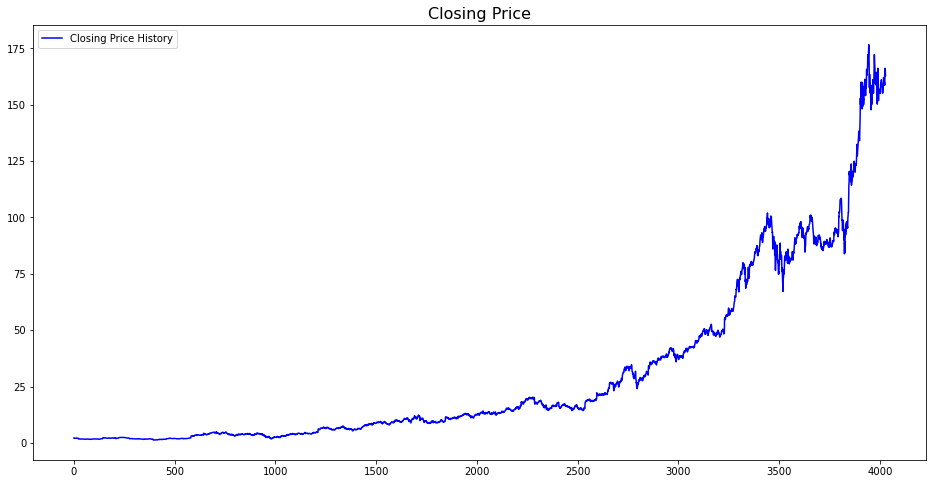

In [ ]:
# Closing Price Graph
plt.figure(figsize=(16,8))
plt.plot(prices_df['Close'], label= 'Closing Price History', color='blue')
plt.legend()
plt.title("Closing Price", fontsize=16)

Text(0.5, 1.0, 'Moving Average')

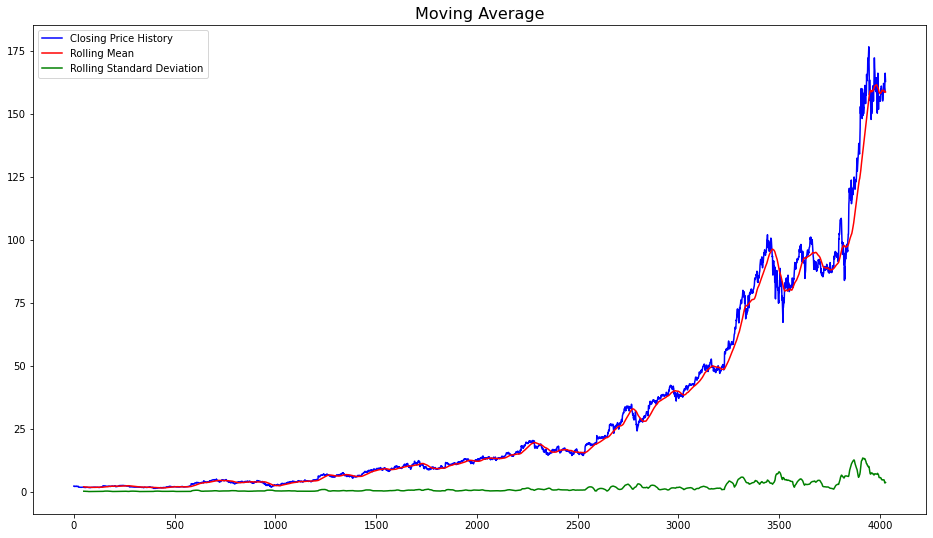

In [ ]:
# Plotting Moving average
close= prices_df['Close']

ma= close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(16,9))
plt.plot(prices_df['Close'], label= 'Closing Price History', color='blue')
plt.plot(ma, label= 'Rolling Mean', color='red')
plt.plot(std, label= 'Rolling Standard Deviation', color='green')
plt.legend()

plt.title("Moving Average", fontsize=16)

Text(0.5, 1.0, 'Returns')

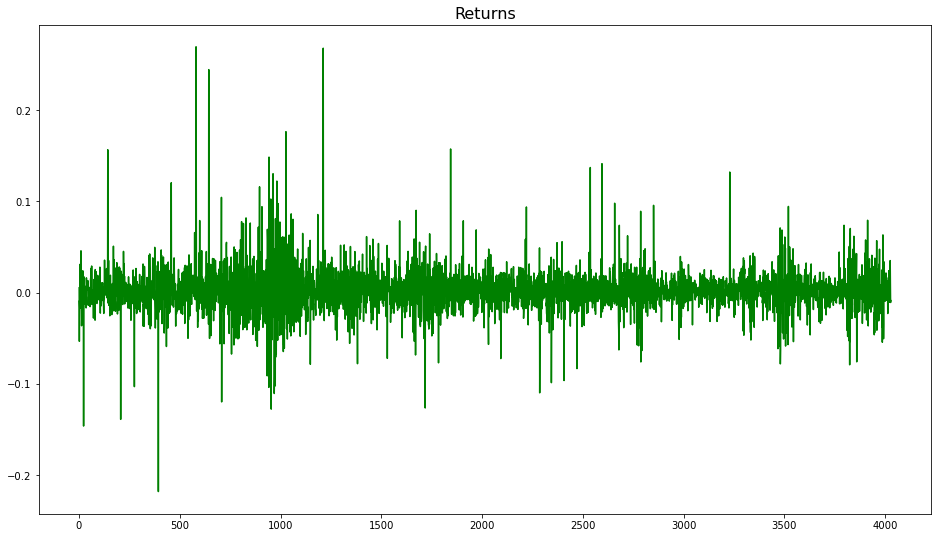

In [ ]:
# Plotting Returns

returns= close/close.shift(1)-1

plt.figure(figsize=(16,9))
plt.plot(returns, label='Return',color='green')
plt.title("Returns", fontsize=16)

In [ ]:
# Stationarity Test

# defining the function

def test_stationarity(timeseries):
    rolmean= timeseries.rolling(20).mean()
    rolstd= timeseries.rolling(20).std()
    
    # Plotting Rolling Statistics
    
    plt.figure(figsize=(16,9))
    plt.plot(timeseries, color='blue', label='original')
    plt.plot(rolmean, color='red', label='rolling mean')
    plt.plot(rolstd, color='black', label='rolling standard deviation')
    plt.legend()
    plt.title("Rolling Mean and Standard Deviation", fontsize=16)
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
           print("Weak evidence against null hypothesis, time series is non-stationary ")

In [ ]:
#splitting the data
train, test = prices_df[:3500], prices_df[3500:len(prices_df)]

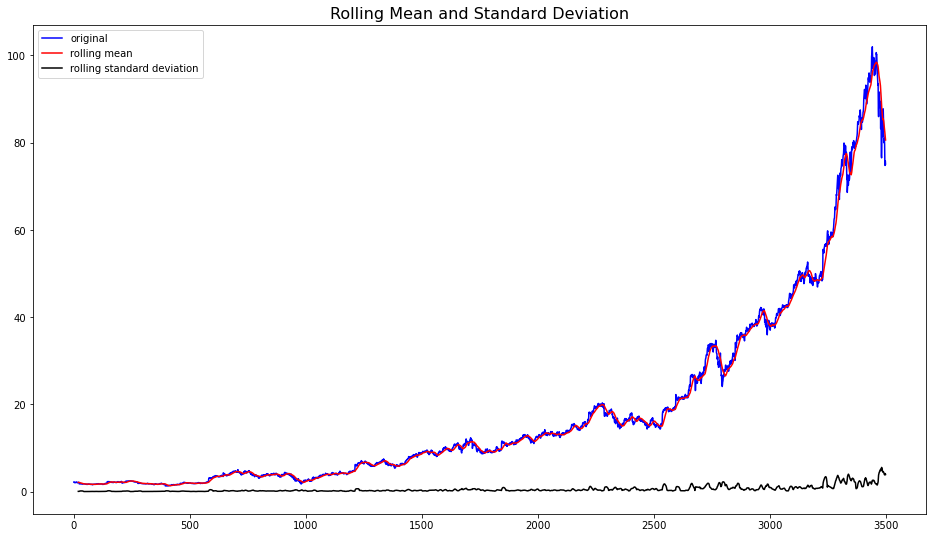

Results of dickey fuller test
ADF Test Statistic : 0.8530301075230062
p-value : 0.9924456968937135
#Lags Used : 27
Number of Observations Used : 3472
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
# applying stationarity test on train close data
test_stationarity(train['Close'])

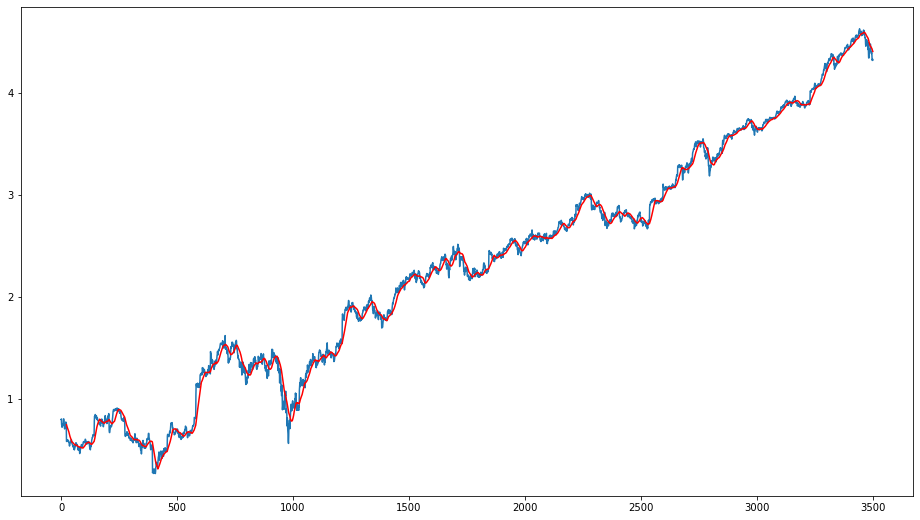

In [ ]:
train_log= np.log(train['Close'])
test_log= np.log(test['Close'])

mav= train_log.rolling(24).mean()
plt.figure(figsize=(16,9))
plt.plot(train_log)
plt.plot(mav, color='red')

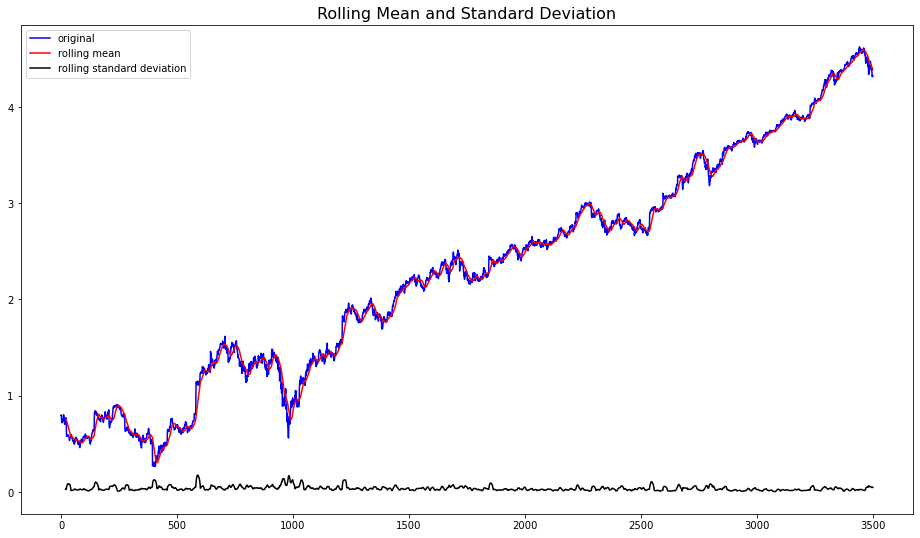

Results of dickey fuller test
ADF Test Statistic : -0.025584081676914616
p-value : 0.9563644630952821
#Lags Used : 2
Number of Observations Used : 3497
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

test_stationarity(train_log)

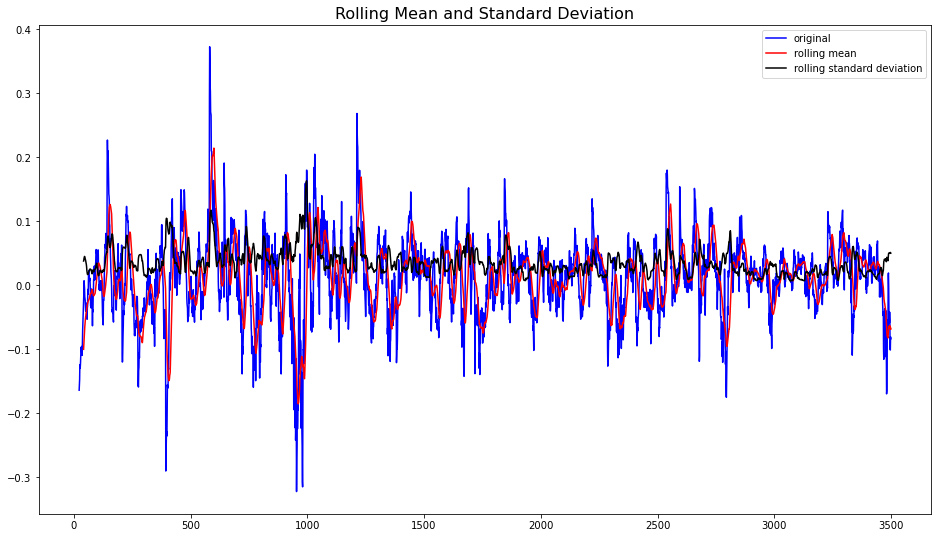

Results of dickey fuller test
ADF Test Statistic : -8.835545314453183
p-value : 1.7231571214720426e-14
#Lags Used : 27
Number of Observations Used : 3449
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
train_log_diff= train_log-mav
train_log_diff.dropna(inplace=True)

test_stationarity(train_log_diff)

In [ ]:
## using auto arima to make predictions using log data

from pmdarima import auto_arima

model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16033.381, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16029.587, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16027.591, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16027.591, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16025.667, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16035.191, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16037.170, Time=1.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-16035.179, Time=1.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16025.664, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-16033.126, Time=1.98 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16032.516, Time=0.53 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 9.185 seconds


Text(0, 0.5, 'Actual Stock Price')

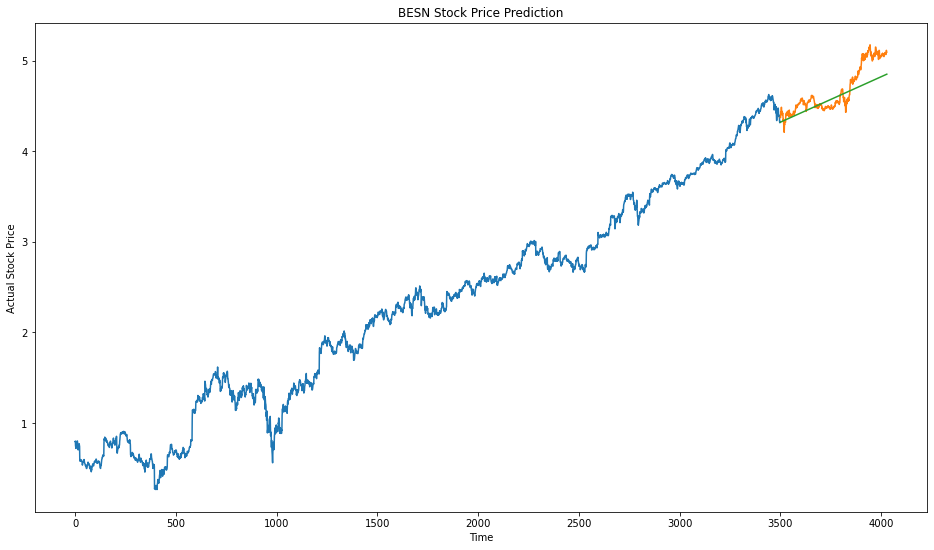

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [ ]:
rms= np.sqrt(mean_squared_error(test_log, predictions))
print("RMSE : ",rms)

RMSE :  0.1596569862690818


## Step 4:- Merge the Historical and Textual Data

In [ ]:
df_merge= pd.merge(headlines_df, prices_df, how='inner',on='Date')
df_merge

,Date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2004-12-31,2000 migrant labourers lost IAF comes to rescu...,0.377969,0.000508,-0.9965,0.183,0.719,0.099,2.274500,2.208000,2.256500,2.214500,95814000
1,2005-01-03,ICAI compliments minister Partnering for futur...,0.406857,0.065283,-0.9972,0.189,0.697,0.114,2.272000,2.210500,2.247500,2.226000,208930000
2,2005-01-04,Arab Gaze Uniform Laws Tsunami Relief Double S...,0.369270,0.086762,-0.9097,0.084,0.846,0.069,2.163000,2.075000,2.133500,2.107000,388370000
3,2005-01-05,Quake Rumours Mishap reunites 12yr boy with fa...,0.417271,0.085289,-0.9955,0.152,0.746,0.101,2.138000,2.078000,2.078500,2.088500,167084000
4,2005-01-06,Doon School preparing to admit girls Market Ma...,0.353227,0.166925,0.6925,0.094,0.801,0.104,2.112500,2.045000,2.090500,2.052500,174018000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2020-12-24,How to set the mood for sex during cold winter...,0.391801,0.049680,-0.9991,0.096,0.836,0.068,160.100006,158.449997,159.695007,158.634506,29038000
4025,2020-12-28,Horoscope Today 28 December 2020 Check astrolo...,0.412283,0.068677,-0.9998,0.142,0.765,0.093,165.199997,158.634506,159.699997,164.197998,113736000
4026,2020-12-29,Man recovers charred remains of thief from his...,0.423628,0.062355,-0.9999,0.153,0.751,0.096,167.532501,164.061005,165.496994,166.100006,97458000
4027,2020-12-30,Numerology Readings 30 December 2020 Predictio...,0.439721,0.041033,-0.9999,0.145,0.769,0.086,167.104996,164.123505,167.050003,164.292496,64186000


### Step 5:- Creating Dataset for model training

In [ ]:
df_final= df_merge[['Close','Subjectivity', 'Polarity','Compound','Negative','Neutral','Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2.214500,0.377969,0.000508,-0.9965,0.183,0.719,0.099
1,2.226000,0.406857,0.065283,-0.9972,0.189,0.697,0.114
2,2.107000,0.369270,0.086762,-0.9097,0.084,0.846,0.069
3,2.088500,0.417271,0.085289,-0.9955,0.152,0.746,0.101
4,2.052500,0.353227,0.166925,0.6925,0.094,0.801,0.104
...,...,...,...,...,...,...,...
4024,158.634506,0.391801,0.049680,-0.9991,0.096,0.836,0.068
4025,164.197998,0.412283,0.068677,-0.9998,0.142,0.765,0.093
4026,166.100006,0.423628,0.062355,-0.9999,0.153,0.751,0.096
4027,164.292496,0.439721,0.041033,-0.9999,0.145,0.769,0.086


## Step 6:- Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [ ]:
df= pd.DataFrame(scaler.fit_transform(df_final))
df.columns= df_final.columns
df.index= df_final.index

In [ ]:
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.005198,0.398534,0.168574,0.00175,0.597826,0.494983,0.276596
1,0.005263,0.491516,0.346158,0.00140,0.630435,0.421405,0.356383
2,0.004584,0.370537,0.405045,0.04515,0.059783,0.919732,0.117021
3,0.004479,0.525035,0.401007,0.00225,0.429348,0.585284,0.287234
4,0.004273,0.318899,0.624815,0.84625,0.114130,0.769231,0.303191


In [ ]:
X= df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.398534,0.168574,0.00175,0.597826,0.494983,0.276596
1,0.491516,0.346158,0.00140,0.630435,0.421405,0.356383
2,0.370537,0.405045,0.04515,0.059783,0.919732,0.117021
3,0.525035,0.401007,0.00225,0.429348,0.585284,0.287234
4,0.318899,0.624815,0.84625,0.114130,0.769231,0.303191
...,...,...,...,...,...,...
4024,0.443057,0.303382,0.00045,0.125000,0.886288,0.111702
4025,0.508981,0.355462,0.00010,0.375000,0.648829,0.244681
4026,0.545494,0.338132,0.00005,0.434783,0.602007,0.260638
4027,0.597293,0.279677,0.00005,0.391304,0.662207,0.207447


In [ ]:
y= df['Close']
y

0       0.005198
1       0.005263
2       0.004584
3       0.004479
4       0.004273
          ...   
4024    0.897655
4025    0.929397
4026    0.940249
4027    0.929936
4028    0.921686
Name: Close, Length: 4029, dtype: float64

## Step 7:- Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

## Step 8:- Deploying Different models
### Applying Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.029573472679374626


#### Applying DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.06092191081654525


#### Applying AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb= AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pred= adb.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.03576540774103073


# Conclusion:
#### RandomForestRegressor Model :- Mean Squared Error: 0.029255952125643265
#### DecisionTreeRegressor Model :- Mean Squared Error: 0.05559582715630679
#### AdaBoostRegressor Model :- Mean Squared Error: 0.031996576929458787
#### The best performing model is RandomForestRegressor